Installing necessary Requirements

In [ ]:
pip install -U Ultralytics

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!cd yolov5
!pip install -r requirements.txt  # install

Cloning the github repository for easy access of the files

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-287-g574331f9 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)


Setup complete ✅ (32 CPUs, 62.7 GB RAM, 75.5/1006.9 GB disk)


In [ ]:
import torch

Downloading the yolov5 model.

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-287-g574331f9 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
im = 'https://ultralytics.com/images/zidane.jpg'

In [ ]:
# Inference
results = model(im)

results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,742.965027,48.353790,1141.847778,720.000000,0.881181,0,person
1,442.008850,437.519592,496.650818,709.991150,0.675224,27,tie
2,123.011353,193.261627,715.751404,719.768188,0.664985,0,person
3,982.798096,308.415100,1027.355713,419.993042,0.259530,27,tie


Checking if the model is doing well on random images from the repository

In [ ]:
import cv2
import torch
from PIL import Image

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Images
for f in 'zidane.jpg', 'bus.jpg':
    torch.hub.download_url_to_file('https://ultralytics.com/images/' + f, f)  # download 2 images
im1 = Image.open('zidane.jpg')  # PIL image
im2 = cv2.imread('bus.jpg')[..., ::-1]  # OpenCV image (BGR to RGB)

# Inference
results = model([im1, im2], size=640)  # batch of images

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[0]  # im1 predictions (pandas)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-287-g574331f9 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
100%|██████████| 165k/165k [00:00<00:00, 6.96MB/s]
100%|██████████| 476k/476k [00:00<00:00, 10.3MB/s]
image 1/2: 720x1280 2 persons, 2 ties
image 2/2: 1080x810 4 persons, 1 bus
Speed: 8.3ms pre-process, 23.6ms inference, 1.2ms NMS per image at shape (2, 3, 640, 640)
Saved 2 images to runs/detect/exp2


,xmin,ymin,xmax,ymax,confidence,class,name
0,742.569519,48.040802,1141.216553,716.655273,0.881913,0,person
1,442.064697,437.536072,496.798157,709.869446,0.687422,27,tie
2,125.246460,193.684296,712.012634,713.056274,0.638556,0,person
3,982.883362,308.352966,1027.358154,420.091248,0.261698,27,tie


Below is the demo of how well Yolov5 is working on detecting objects in the images.

In [ ]:
import torch

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
# Images
img = "https://ultralytics.com/images/zidane.jpg"
# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-287-g574331f9 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 2 ties
Speed: 441.0ms pre-process, 12.7ms inference, 99.3ms NMS per image at shape (1, 3, 384, 640)


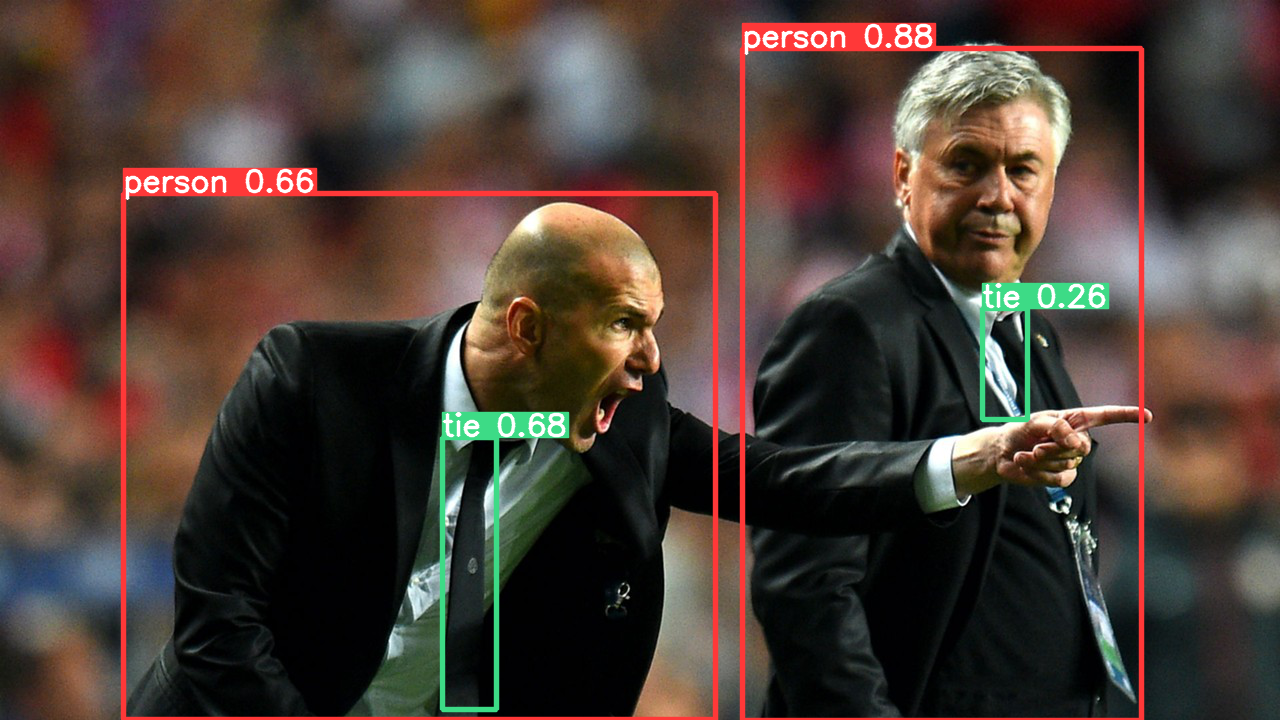

In [ ]:
results.show()

We now train the model on our own dataset where I have modified the coco128 yaml file to give the paths of the train validation dataset. These datasets have images or frames eextracted from the video taken on phone using the frames_extraction.ipynb. We got 30 frames from the video, which was split into 20 train and 10 testing. These 30 images were manually boxed and labelled using makesense.ai where we labelled each image belonging to 6 classes, i.e bus, car, van, building, traffic light and trees. The labels of these images were then downloaded to the local systema and copied to the train and validation folders along with their images. Below is the model that was run for 170 epochs training on the images.

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 3 --epochs 170 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=170, batch_size=3, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-287-g574331f9 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, c

The weights were saved post training and these weights were loaded below to predict on the source1 video which is a live video. The end result is a video with object detection and boxes plotted.

In [ ]:
!python detect.py --weights runs/train/exp21/weights/last.pt --img 640 --conf 0.50 --source Source1.mp4

detect: weights=['runs/train/exp21/weights/last.pt'], source=Source1.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-287-g574331f9 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/173) /app/yolov5/Source1.mp4: 384x640 5 Carss, 1 Bus, 42.8ms
video 1/1 (2/173) /app/yolov5/Source1.mp4: 384x640 5 Carss, 1 Bus, 3.7ms
video 1/1 (3/173) /app/yolov5/Source1.mp4: 384x640 6 Carss, 1 Bus, 3.5ms
video 1/1 (4/173) /app/yolov5/Source1.mp4: 384x640 5 Carss, 1 Traffic lights, 1 Bus, 3.6ms
video 1/1 

Attachments to the file:
1. frames_extraction.ipynb
2. Screenshot of the labelling and box plotting on train and validation data.
3. Source video before running throught the model.
4. Source video after running throught the model with image prediction and object detection.

Github link: https://github.com/AV-D/Deep-learning-Experiments